In [7]:
import pandas as pd
import numpy as np
# from date import date
from datetime import date


In [8]:
import jdatetime

# Define a Shamsi date
shamsi_year = 1403
shamsi_month = 4
shamsi_day = 26

# Create a jdatetime.date object
shamsi_date = jdatetime.date(shamsi_year, shamsi_month, shamsi_day)

# Convert the Shamsi date to a Gregorian date
miladi_date = shamsi_date.togregorian()

In [9]:
miladi_date


datetime.date(2024, 7, 16)

In [10]:
raw_data = pd.read_csv(open('Medical_records.csv', 'rb'))



In [ ]:
raw_data.head()


,N,Admission Date (Shamsi),Age,Sex,Main Agent,Discharge Status,Multiple Agents,Alcohol,Opium,Benzodiazepines,Drugs,Organophosphates
0,4160120,1399/01/06,49,M,Opium,B,NaN,NaN,NaN,NaN,NaN,NaN
1,4160616,1399/01/07,28,M,Opium*,B,NaN,NaN,NaN,NaN,NaN,NaN
2,4162104,1399/01/12,26,M,Drug,B,NaN,NaN,NaN,NaN,NaN,NaN
3,4162282,1399/01/13,24,F,Alcohol,B,NaN,NaN,NaN,NaN,NaN,NaN
4,4162926,1399/01/15,21,M,Drug/ Alcohol,B,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
raw_data.columns


Index(['N', 'Admission Date (Shamsi)', 'Age', 'Sex', 'Main Agent',
       'Discharge Status', 'Multiple Agents', 'Alcohol', 'Opium',
       'Benzodiazepines', 'Drugs', 'Organophosphates'],
      dtype='object')

In [41]:
def time_fixer(obj_):
    obj_ = [x.strip() for x in obj_.split('/')]
    if len(str(obj_[0]).strip()) ==4:
        return jdatetime.date(int(obj_[0]), int(obj_[1]), int(obj_[2])).togregorian()
    elif len(str(obj_[2]).strip()) ==4:
        return jdatetime.date(int(obj_[2]), int(obj_[1]), int(obj_[0])).togregorian()
    else:
        print(obj_, 'is not compatiblae')

In [ ]:
correct_date = []
for i, d in raw_data.iterrows():
    correct_date.append(time_fixer(d['Admission Date (Shamsi)']))
    
raw_data['date'] = correct_date

In [46]:
raw_data.head()

,N,Admission Date (Shamsi),Age,Sex,Main Agent,Discharge Status,Multiple Agents,Alcohol,Opium,Benzodiazepines,Drugs,Organophosphates,date
0,4160120,1399/01/06,49,M,Opium,B,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-25
1,4160616,1399/01/07,28,M,Opium*,B,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-26
2,4162104,1399/01/12,26,M,Drug,B,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-31
3,4162282,1399/01/13,24,F,Alcohol,B,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-01
4,4162926,1399/01/15,21,M,Drug/ Alcohol,B,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-03


In [47]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   N                        3972 non-null   int64  
 1   Admission Date (Shamsi)  3972 non-null   object 
 2   Age                      3972 non-null   int64  
 3   Sex                      3972 non-null   object 
 4   Main Agent               3972 non-null   object 
 5   Discharge Status         3972 non-null   object 
 6   Multiple Agents          0 non-null      float64
 7   Alcohol                  0 non-null      float64
 8   Opium                    0 non-null      float64
 9   Benzodiazepines          0 non-null      float64
 10  Drugs                    0 non-null      float64
 11  Organophosphates         0 non-null      float64
 12  date                     3972 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 403.5+ KB


In [93]:
data = raw_data[['N', 'Admission Date (Shamsi)', 'Age', 'Sex', 'Main Agent',
       'Discharge Status', 'date']]
data = data.drop(['N', 'Admission Date (Shamsi)'], axis=1)

In [94]:
data.head()

,Age,Sex,Main Agent,Discharge Status,date
0,49,M,Opium,B,2020-03-25
1,28,M,Opium*,B,2020-03-26
2,26,M,Drug,B,2020-03-31
3,24,F,Alcohol,B,2020-04-01
4,21,M,Drug/ Alcohol,B,2020-04-03


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               3972 non-null   int64 
 1   Sex               3972 non-null   object
 2   Main Agent        3972 non-null   object
 3   Discharge Status  3972 non-null   object
 4   date              3972 non-null   object
dtypes: int64(1), object(4)
memory usage: 155.3+ KB


In [96]:
for c in data.columns:
    print('##### {} #####'.format(c))
    print(data[c].describe())
    print('\n\n')

##### Age #####
count    3972.000000
mean       30.066717
std        12.954751
min        14.000000
25%        20.000000
50%        28.000000
75%        37.000000
max        96.000000
Name: Age, dtype: float64



##### Sex #####
count     3972
unique       2
top          M
freq      2242
Name: Sex, dtype: object



##### Main Agent #####
count     3972
unique      20
top       Drug
freq      1274
Name: Main Agent, dtype: object



##### Discharge Status #####
count     3972
unique       4
top          B
freq      1796
Name: Discharge Status, dtype: object



##### date #####
count           3972
unique          1011
top       2022-05-01
freq              29
Name: date, dtype: object





In [97]:
df = data

Data Overview:
   Age Sex     Main Agent Discharge Status       date month_year  month  \
0   49   M         Opium                 B 2020-03-25    2020-03      3   
1   28   M         Opium*                B 2020-03-26    2020-03      3   
2   26   M           Drug                B 2020-03-31    2020-03      3   
3   24   F        Alcohol                B 2020-04-01    2020-04      4   
4   21   M  Drug/ Alcohol                B 2020-04-03    2020-04      4   

     weekday  season  year  Sex_encoded  Agent_encoded  Status_encoded  
0  Wednesday  Spring  2020            1             14               0  
1   Thursday  Spring  2020            1             15               0  
2    Tuesday  Spring  2020            1              6               0  
3  Wednesday  Spring  2020            0              0               0  
4     Friday  Spring  2020            1             11               0  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Data colum

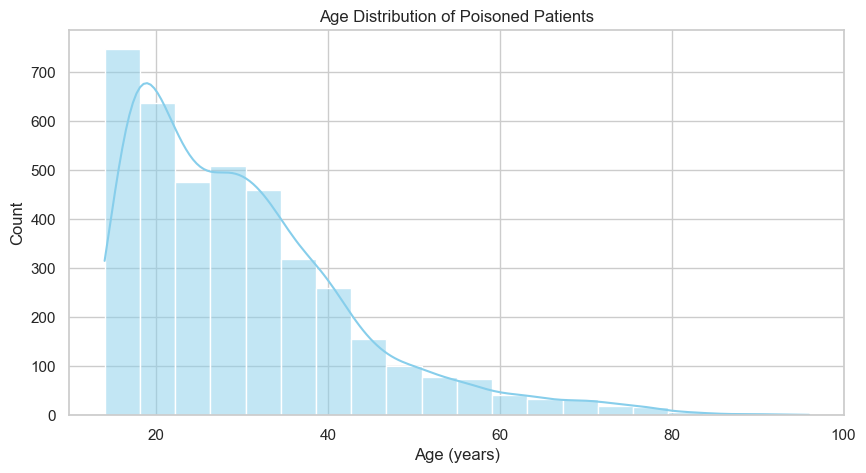

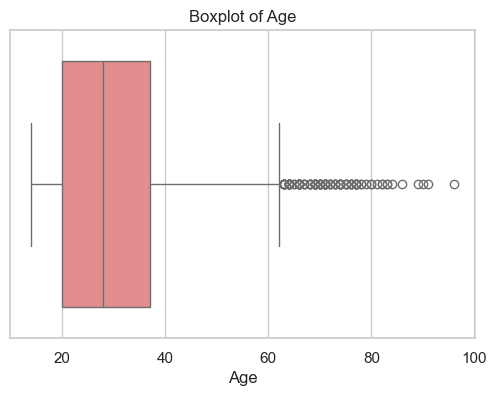

/var/folders/rv/kmlfzz_j1v3f0smz3fvxv3l80000gn/T/ipykernel_79856/891221625.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='Set2')


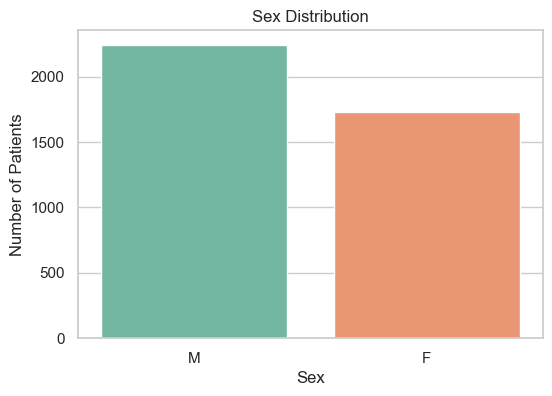

/var/folders/rv/kmlfzz_j1v3f0smz3fvxv3l80000gn/T/ipykernel_79856/891221625.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_agents.values, y=top_agents.index, palette='viridis')


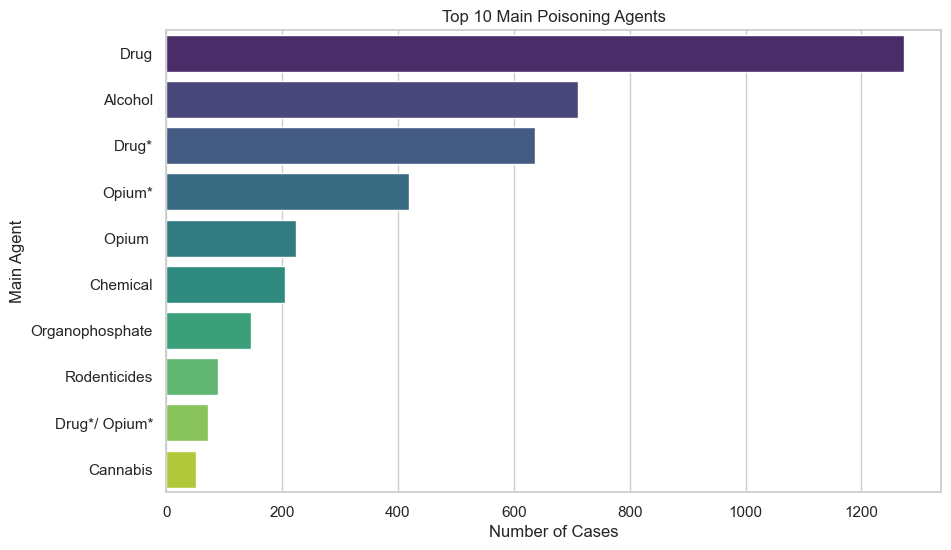

/var/folders/rv/kmlfzz_j1v3f0smz3fvxv3l80000gn/T/ipykernel_79856/891221625.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Discharge Status', data=df, palette='coolwarm')


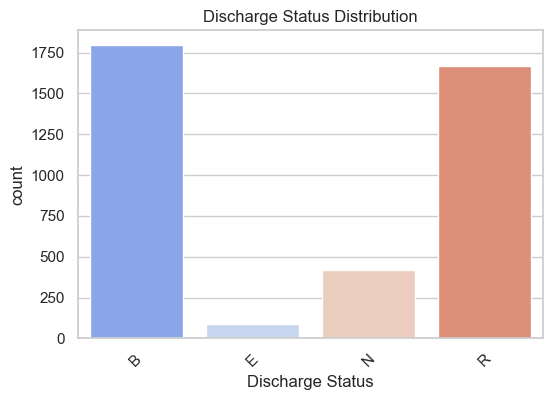

/var/folders/rv/kmlfzz_j1v3f0smz3fvxv3l80000gn/T/ipykernel_79856/891221625.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Discharge Status', y='Age', data=df, palette='pastel')


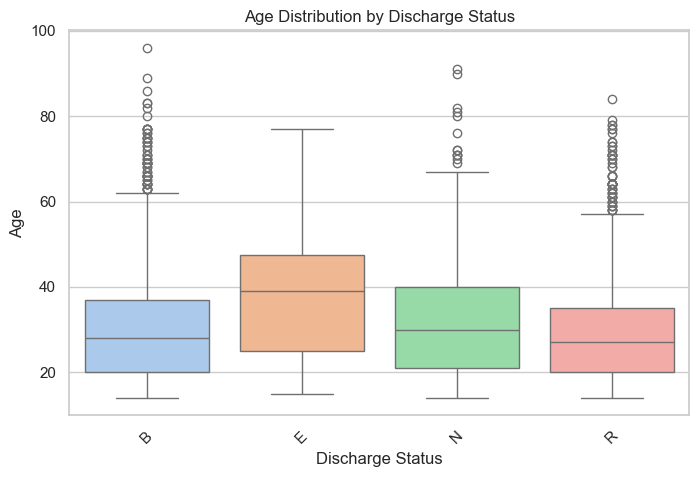

/var/folders/rv/kmlfzz_j1v3f0smz3fvxv3l80000gn/T/ipykernel_79856/891221625.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sex', y='Age', data=df, palette='Set3')


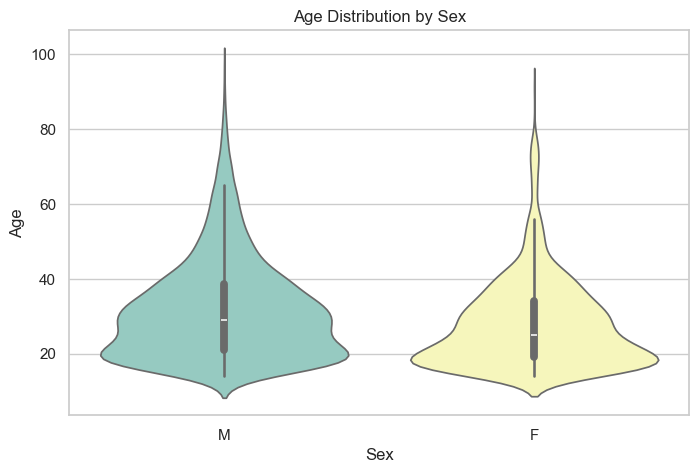

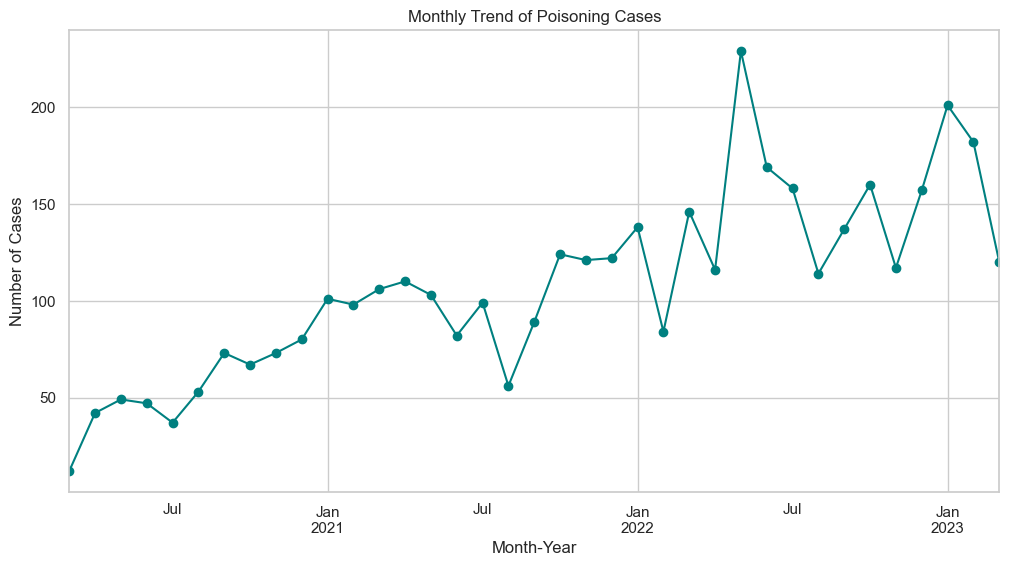

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# ------------------------------
# Load your dataset
# ------------------------------
# Example: df = pd.read_csv("poisoning_data.csv")
# If already loaded:
# df = your_dataframe

# Example placeholder (delete this if using your own df)
# df = pd.read_csv("your_file.csv")

# ------------------------------
# Basic inspection
# ------------------------------
print("Data Overview:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))

# ------------------------------
# 1️⃣ Age Analysis
# ------------------------------
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution of Poisoned Patients')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'], color='lightcoral')
plt.title('Boxplot of Age')
plt.show()

# ------------------------------
# 2️⃣ Sex Distribution
# ------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df, palette='Set2')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.show()

# ------------------------------
# 3️⃣ Main Agent Analysis
# ------------------------------
plt.figure(figsize=(10,6))
top_agents = df['Main Agent'].value_counts().head(10)
sns.barplot(x=top_agents.values, y=top_agents.index, palette='viridis')
plt.title('Top 10 Main Poisoning Agents')
plt.xlabel('Number of Cases')
plt.ylabel('Main Agent')
plt.show()

# ------------------------------
# 4️⃣ Discharge Status
# ------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Discharge Status', data=df, palette='coolwarm')
plt.title('Discharge Status Distribution')
plt.xticks(rotation=45)
plt.show()

# ------------------------------
# 5️⃣ Relationship Between Age and Discharge Status
# ------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='Discharge Status', y='Age', data=df, palette='pastel')
plt.title('Age Distribution by Discharge Status')
plt.xticks(rotation=45)
plt.show()

# ------------------------------
# 6️⃣ Relationship Between Age and Sex
# ------------------------------
plt.figure(figsize=(8,5))
sns.violinplot(x='Sex', y='Age', data=df, palette='Set3')
plt.title('Age Distribution by Sex')
plt.show()

# ------------------------------
# 7️⃣ Date (Trend Over Time)
# ------------------------------
# Ensure 'date' column is datetime type
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['month_year'] = df['date'].dt.to_period('M')
trend = df.groupby('month_year').size()

plt.figure(figsize=(12,6))
trend.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Trend of Poisoning Cases')
plt.xlabel('Month-Year')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

/var/folders/rv/kmlfzz_j1v3f0smz3fvxv3l80000gn/T/ipykernel_79856/4275144705.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette='crest')


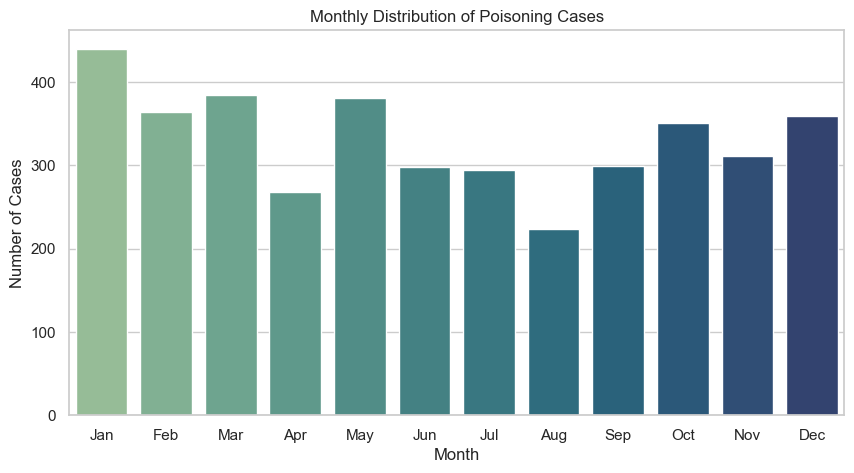

/var/folders/rv/kmlfzz_j1v3f0smz3fvxv3l80000gn/T/ipykernel_79856/4275144705.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=df, order=['Spring','Summer','Fall','Winter'], palette='viridis')


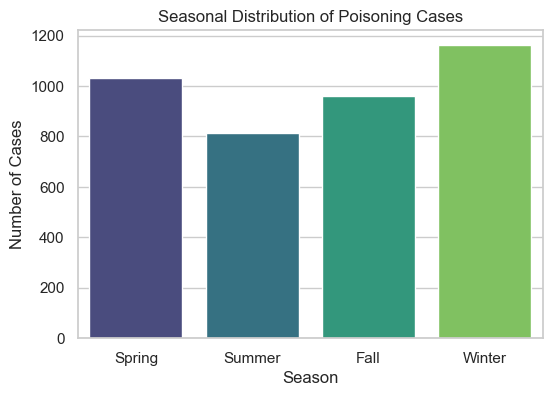

/var/folders/rv/kmlfzz_j1v3f0smz3fvxv3l80000gn/T/ipykernel_79856/4275144705.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weekday', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='pastel')


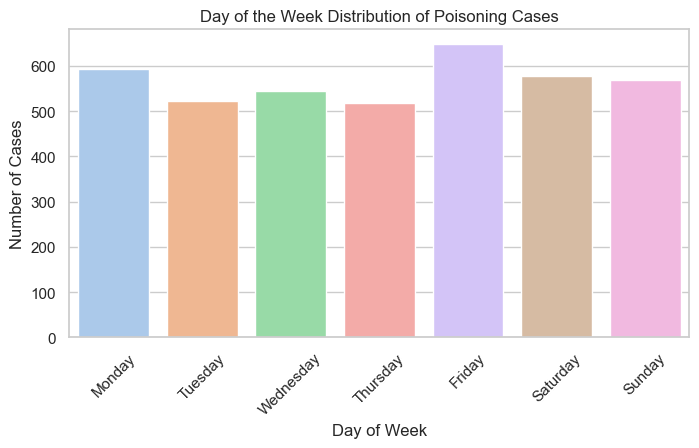

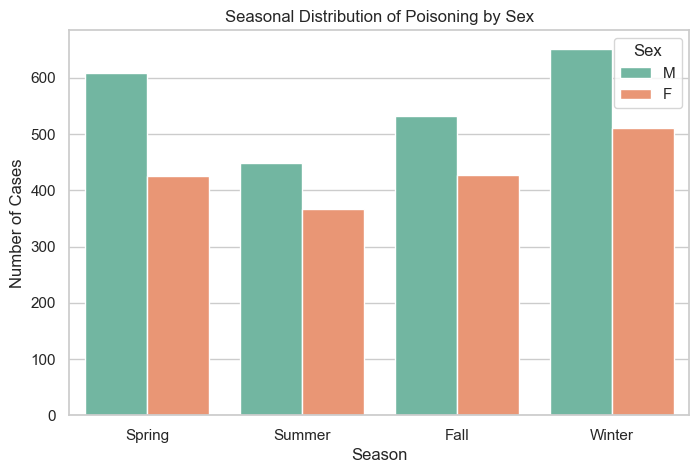

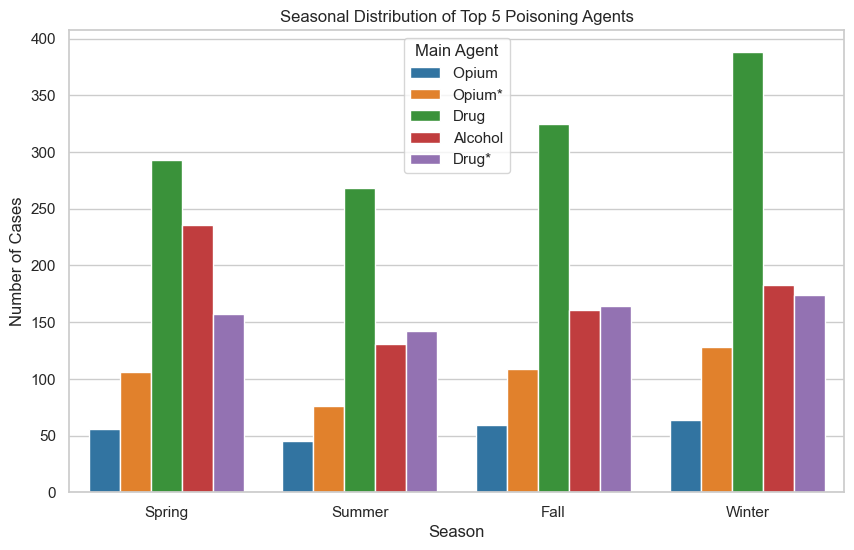

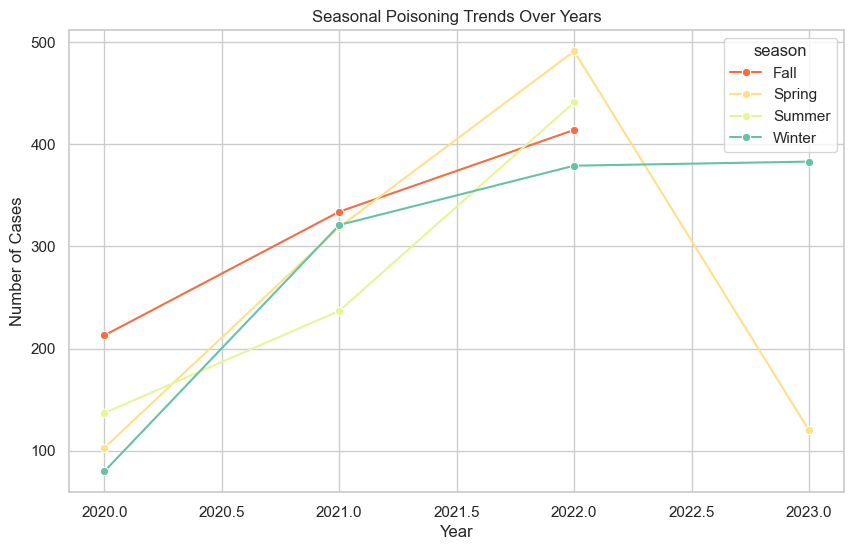

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Assuming your DataFrame is already loaded as df
# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with missing dates
df = df.dropna(subset=['date'])

# -----------------------------------
# Extract seasonal components
# -----------------------------------
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.day_name()

def get_season(month):
    """Return the season name based on the month."""
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season)

# -----------------------------------
# 1️⃣ Monthly pattern
# -----------------------------------
plt.figure(figsize=(10,5))
month_counts = df['month'].value_counts().sort_index()
sns.barplot(x=month_counts.index, y=month_counts.values, palette='crest')
plt.title('Monthly Distribution of Poisoning Cases')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.xticks(range(0,12), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

# -----------------------------------
# 2️⃣ Seasonal pattern
# -----------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='season', data=df, order=['Spring','Summer','Fall','Winter'], palette='viridis')
plt.title('Seasonal Distribution of Poisoning Cases')
plt.xlabel('Season')
plt.ylabel('Number of Cases')
plt.show()

# -----------------------------------
# 3️⃣ Weekly pattern
# -----------------------------------
plt.figure(figsize=(8,4))
sns.countplot(x='weekday', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='pastel')
plt.title('Day of the Week Distribution of Poisoning Cases')
plt.xlabel('Day of Week')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

# -----------------------------------
# 4️⃣ Optional: Seasonality by Sex
# -----------------------------------
plt.figure(figsize=(8,5))
sns.countplot(x='season', hue='Sex', data=df, order=['Spring','Summer','Fall','Winter'], palette='Set2')
plt.title('Seasonal Distribution of Poisoning by Sex')
plt.xlabel('Season')
plt.ylabel('Number of Cases')
plt.legend(title='Sex')
plt.show()

# -----------------------------------
# 5️⃣ Optional: Seasonality by Main Agent (top 5)
# -----------------------------------
top_agents = df['Main Agent'].value_counts().head(5).index
filtered = df[df['Main Agent'].isin(top_agents)]

plt.figure(figsize=(10,6))
sns.countplot(x='season', hue='Main Agent', data=filtered, 
              order=['Spring','Summer','Fall','Winter'], palette='tab10')
plt.title('Seasonal Distribution of Top 5 Poisoning Agents')
plt.xlabel('Season')
plt.ylabel('Number of Cases')
plt.legend(title='Main Agent')
plt.show()

# -----------------------------------
# 6️⃣ Seasonal trend over years (if dataset spans multiple years)
# -----------------------------------
df['year'] = df['date'].dt.year
seasonal_trend = df.groupby(['year', 'season']).size().reset_index(name='cases')

plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='cases', hue='season', data=seasonal_trend, marker='o', palette='Spectral')
plt.title('Seasonal Poisoning Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report

# --------------------------------------------
# 1️⃣ Load and preprocess data
# --------------------------------------------
# Example: df = pd.read_csv("poisoning_data.csv")
# Make sure df has columns: 'Age', 'Sex', 'Main Agent', 'Discharge Status'

# Drop missing values for simplicity
df = df.dropna(subset=['Age', 'Sex', 'Main Agent', 'Discharge Status'])

# Encode categorical columns
sex_encoder = LabelEncoder()
agent_encoder = LabelEncoder()
status_encoder = LabelEncoder()

df['Sex_encoded'] = sex_encoder.fit_transform(df['Sex'])
df['Agent_encoded'] = agent_encoder.fit_transform(df['Main Agent'])
df['Status_encoded'] = status_encoder.fit_transform(df['Discharge Status'])

# Define features (X) and target (y)
X = df[['Age', 'Sex_encoded', 'Agent_encoded']]
y = df['Status_encoded']

# Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# If the discharge status is categorical (e.g., “Recovered”, “Death”, etc.)
# we convert it to one-hot encoding
num_classes = len(df['Status_encoded'].unique())
y_categorical = to_categorical(y, num_classes=num_classes)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical
)

# --------------------------------------------
# 2️⃣ Build the Neural Network
# --------------------------------------------
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# --------------------------------------------
# 3️⃣ Train the Model
# --------------------------------------------
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_split=0.2, verbose=1)

# --------------------------------------------
# 4️⃣ Evaluate Performance
# --------------------------------------------
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.3f}")

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=status_encoder.classes_))

Epoch 1/50


/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - accuracy: 0.3689 - loss: 1.3526 - val_accuracy: 0.5047 - val_loss: 1.1106
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.4519 - loss: 1.1128 - val_accuracy: 0.5047 - val_loss: 1.0462
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.4742 - loss: 1.0892 - val_accuracy: 0.5047 - val_loss: 1.0355
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.4644 - loss: 1.0534 - val_accuracy: 0.4984 - val_loss: 1.0314
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.4582 - loss: 1.0548 - val_accuracy: 0.4937 - val_loss: 1.0296
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.4855 - loss: 1.0282 - val_accuracy: 0.4937 - val_loss: 1.0278
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.4827 - loss: 1.0177 - val_accuracy: 0.4906 - val_loss: 1.0275
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.4772 - loss: 1.0243 - val_accurac

/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Test Accuracy: 0.323

Classification Report:
              precision    recall  f1-score   support

           B       0.57      0.23      0.33       359
           E       0.06      0.67      0.12        18
           N       0.13      0.26      0.17        84
           R       0.48      0.42      0.45       334

    accuracy                           0.32       795
   macro avg       0.31      0.39      0.27       795
weighted avg       0.47      0.32      0.36       795



/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/ut

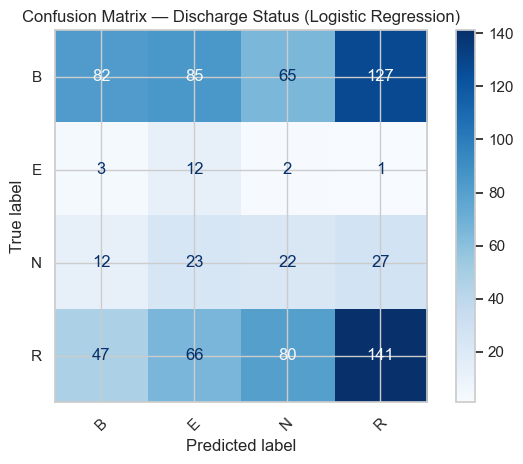

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# -----------------------------
# 0) Basic cleaning
# -----------------------------
df = df.copy()
df = df.dropna(subset=['Age', 'Sex', 'Main Agent', 'Discharge Status'])
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age'])
df['Sex'] = df['Sex'].astype(str)
df['Main Agent'] = df['Main Agent'].astype(str)
df['Discharge Status'] = df['Discharge Status'].astype(str)

# -----------------------------
# 1) Features & Target
# -----------------------------
feature_cols = ['Age', 'Sex', 'Main Agent']
target_col = 'Discharge Status'

X = df[feature_cols]
y_text = df[target_col]

# Encode target labels
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y_text)
num_classes = len(y_encoder.classes_)

# -----------------------------
# 2) Preprocess
# -----------------------------
numeric_features = ['Age']
categorical_features = ['Sex', 'Main Agent']

# ✅ Updated for scikit-learn >=1.6
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
    ],
    remainder='drop'
)

# -----------------------------
# 3) Logistic Regression model
# -----------------------------
if num_classes == 2:
    lr = LogisticRegression(
        penalty='l2',
        solver='liblinear',
        class_weight='balanced',
        max_iter=200,
        random_state=42
    )
else:
    lr = LogisticRegression(
        penalty='l2',
        solver='saga',
        multi_class='multinomial',
        class_weight='balanced',
        max_iter=1000,
        random_state=42
    )

clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('logreg', lr)
])

# -----------------------------
# 4) Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 5) Train & Evaluate
# -----------------------------
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.3f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=y_encoder.classes_))

# Confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, display_labels=y_encoder.classes_,
    cmap='Blues', values_format='d'
)
plt.title('Confusion Matrix — Discharge Status (Logistic Regression)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.stats.proportion import proportions_ztest

sns.set(style='whitegrid')

# Example: df = pd.read_csv('poisoning_data.csv')
df = df.copy()
df = df.dropna(subset=['Age', 'Sex', 'Main Agent', 'Discharge Status', 'date'])
df['date'] = pd.to_datetime(df['date'], errors='coerce')

                Age   Sex Main Agent Discharge Status  \
count   3972.000000  3972       3972             3972   
unique          NaN     2         20                4   
top             NaN     M       Drug                B   
freq            NaN  2242       1274             1796   
mean      30.066717   NaN        NaN              NaN   
min       14.000000   NaN        NaN              NaN   
25%       20.000000   NaN        NaN              NaN   
50%       28.000000   NaN        NaN              NaN   
75%       37.000000   NaN        NaN              NaN   
max       96.000000   NaN        NaN              NaN   
std       12.954751   NaN        NaN              NaN   

                                 date month_year        month weekday  season  \
count                            3972       3972  3972.000000    3972    3972   
unique                            NaN         37          NaN       7       4   
top                               NaN    2022-05          NaN  Friday  W

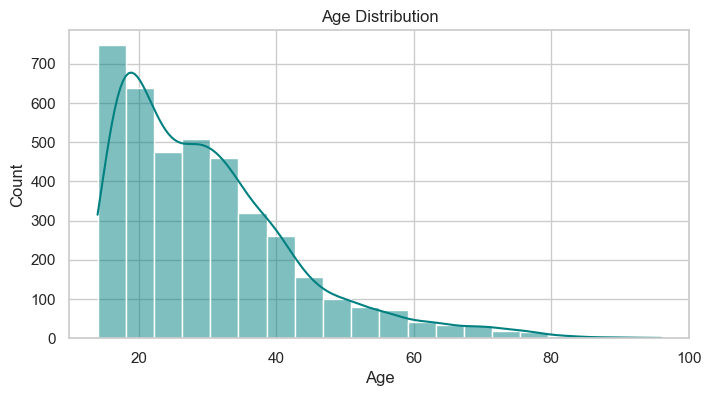

/var/folders/rv/kmlfzz_j1v3f0smz3fvxv3l80000gn/T/ipykernel_79856/4051812512.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='Set2')


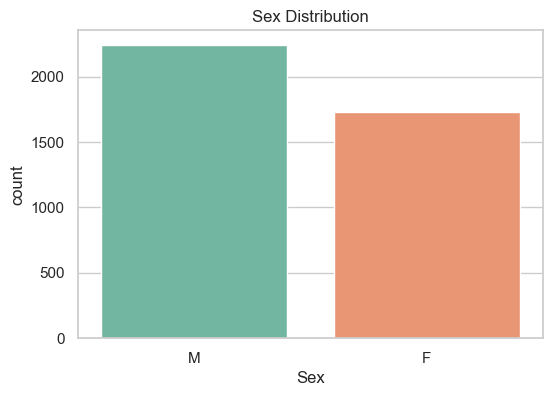

/var/folders/rv/kmlfzz_j1v3f0smz3fvxv3l80000gn/T/ipykernel_79856/4051812512.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Main Agent', data=df, order=df['Main Agent'].value_counts().index[:10], palette='viridis')


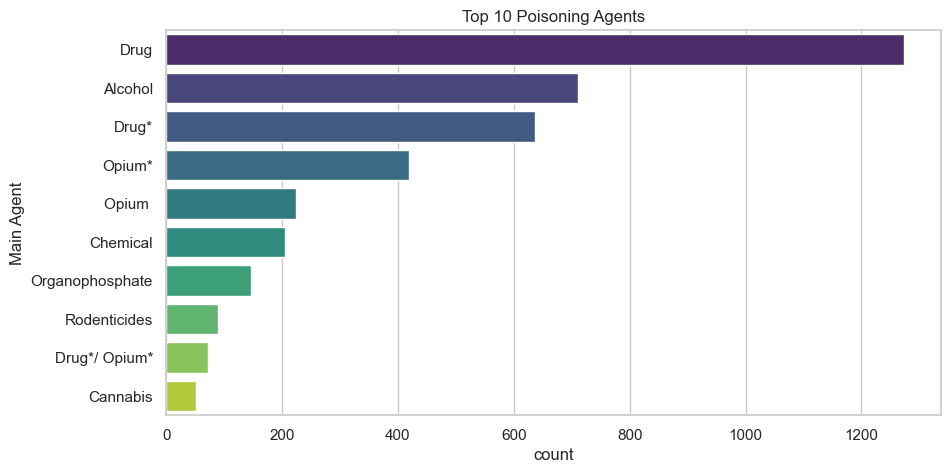

/var/folders/rv/kmlfzz_j1v3f0smz3fvxv3l80000gn/T/ipykernel_79856/4051812512.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Discharge Status', data=df, palette='coolwarm')


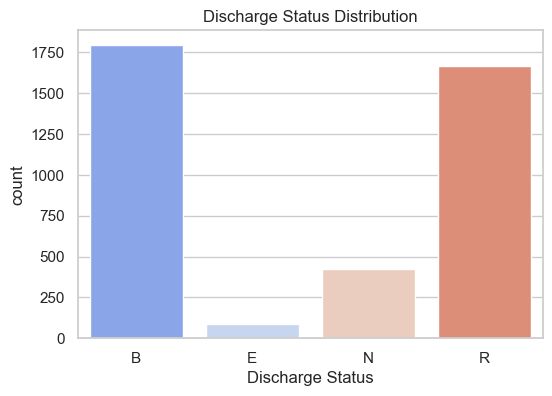

In [107]:
# Summary statistics
print(df.describe(include='all'))

# Distribution plots
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], kde=True, color='teal', bins=20)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df, palette='Set2')
plt.title('Sex Distribution')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(y='Main Agent', data=df, order=df['Main Agent'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Poisoning Agents')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Discharge Status', data=df, palette='coolwarm')
plt.title('Discharge Status Distribution')
plt.show()

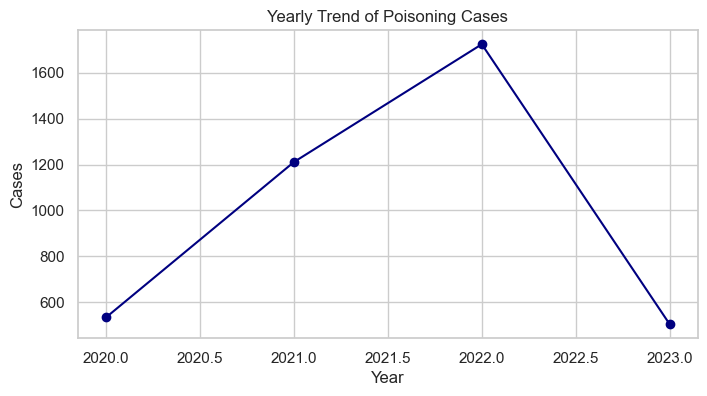

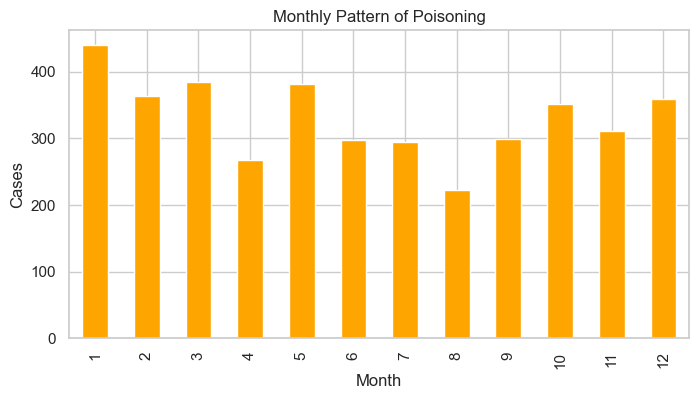

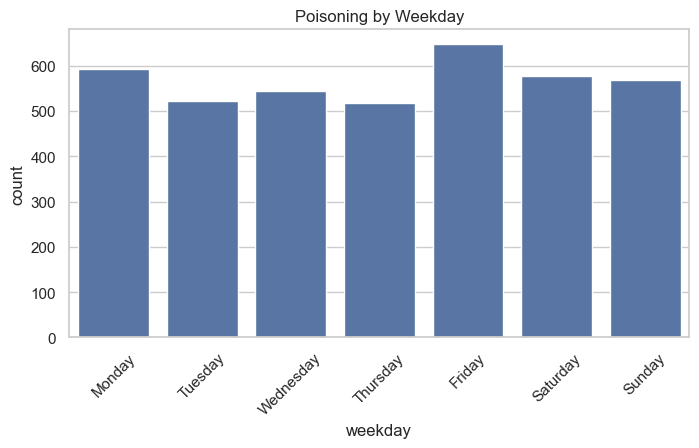

In [108]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.day_name()

# Trend by year
trend = df.groupby('year').size()
trend.plot(marker='o', color='navy', figsize=(8,4))
plt.title('Yearly Trend of Poisoning Cases')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.show()

# Monthly pattern
monthly = df.groupby('month').size()
monthly.plot(kind='bar', color='orange', figsize=(8,4))
plt.title('Monthly Pattern of Poisoning')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.show()

# Weekly pattern
plt.figure(figsize=(8,4))
sns.countplot(x='weekday', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Poisoning by Weekday')
plt.xticks(rotation=45)
plt.show()

/var/folders/rv/kmlfzz_j1v3f0smz3fvxv3l80000gn/T/ipykernel_79856/1508298466.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Discharge Status', y='Age', data=df, palette='pastel')


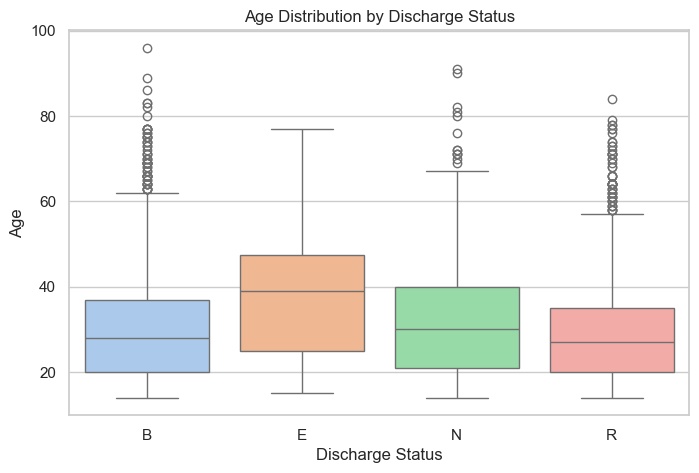

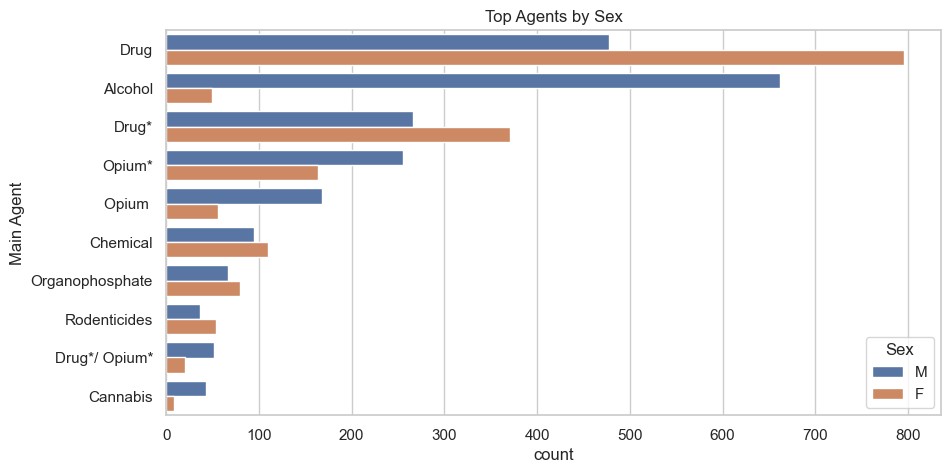

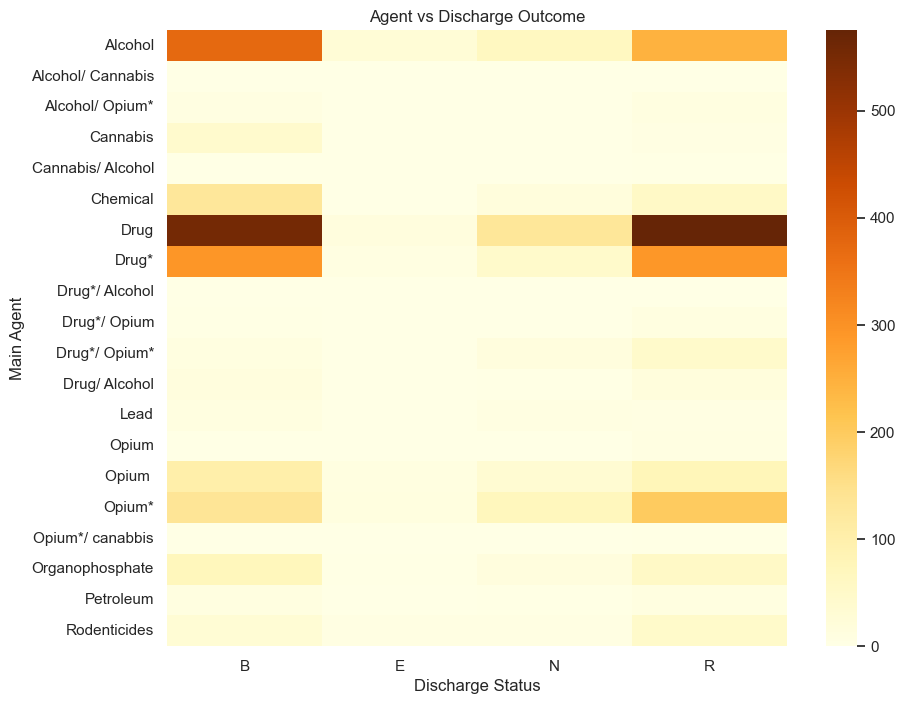

In [109]:
# Age vs Discharge Status
plt.figure(figsize=(8,5))
sns.boxplot(x='Discharge Status', y='Age', data=df, palette='pastel')
plt.title('Age Distribution by Discharge Status')
plt.show()

# Main Agent vs Sex
plt.figure(figsize=(10,5))
sns.countplot(y='Main Agent', hue='Sex', data=df, order=df['Main Agent'].value_counts().index[:10])
plt.title('Top Agents by Sex')
plt.show()

# Crosstab heatmap (Main Agent vs Discharge Status)
pivot = pd.crosstab(df['Main Agent'], df['Discharge Status'])
plt.figure(figsize=(10,8))
sns.heatmap(pivot, cmap='YlOrBr', annot=False)
plt.title('Agent vs Discharge Outcome')
plt.show()

In [110]:
recovered = df[df['Discharge Status'].str.contains('Recovered', case=False, na=False)]['Age']
died = df[df['Discharge Status'].str.contains('Death', case=False, na=False)]['Age']

t_stat, p_val = stats.ttest_ind(recovered, died, equal_var=False)
print(f"T-test between Recovered and Died ages: t={t_stat:.2f}, p={p_val:.4f}")

T-test between Recovered and Died ages: t=nan, p=nan


/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [111]:
contingency = pd.crosstab(df['Sex'], df['Discharge Status'])
chi2, p, dof, ex = stats.chi2_contingency(contingency)
print(f"Chi-square Sex vs Discharge Status: χ²={chi2:.2f}, p={p:.4f}")


Chi-square Sex vs Discharge Status: χ²=24.84, p=0.0000


In [112]:
contingency_agent = pd.crosstab(df['Main Agent'], df['Discharge Status'])
chi2, p, dof, ex = stats.chi2_contingency(contingency_agent)
print(f"Chi-square Main Agent vs Discharge Status: χ²={chi2:.2f}, p={p:.4f}")

Chi-square Main Agent vs Discharge Status: χ²=256.07, p=0.0000


In [113]:
survived = df['Discharge Status'].str.contains('Recovered', case=False, na=False)
male_success = ((df['Sex']=='Male') & survived).sum()
female_success = ((df['Sex']=='Female') & survived).sum()
male_total = (df['Sex']=='Male').sum()
female_total = (df['Sex']=='Female').sum()

count = np.array([male_success, female_success])
nobs = np.array([male_total, female_total])

z, pval = proportions_ztest(count, nobs)
print(f"Z-test for survival by sex: z={z:.2f}, p={pval:.4f}")

Z-test for survival by sex: z=nan, p=nan


/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/statsmodels/stats/proportion.py:1004: RuntimeWarning: invalid value encountered in divide
  prop = count * 1. / nobs
/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/statsmodels/stats/proportion.py:1018: RuntimeWarning: invalid value encountered in scalar divide
  p_pooled = np.sum(count) * 1. / np.sum(nobs)
/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/statsmodels/stats/proportion.py:1020: RuntimeWarning: divide by zero encountered in divide
  nobs_fact = np.sum(1. / nobs)


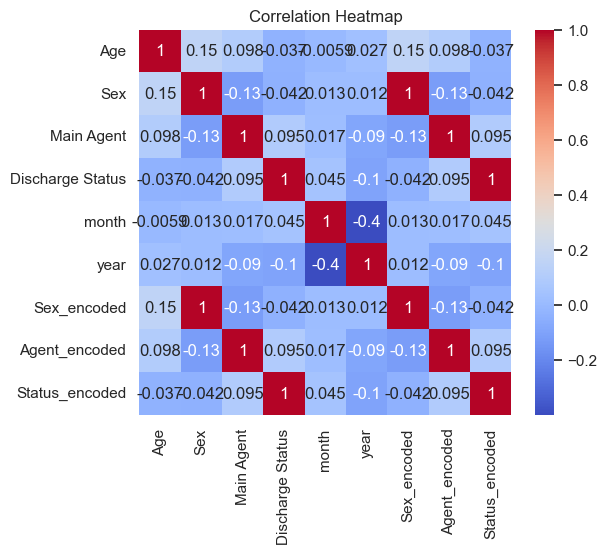

In [114]:
# Encode categorical vars temporarily
le = LabelEncoder()
df_corr = df.copy()
for col in ['Sex', 'Main Agent', 'Discharge Status']:
    df_corr[col] = le.fit_transform(df_corr[col].astype(str))

corr = df_corr.corr(numeric_only=True)
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = df[['Age', 'Sex', 'Main Agent']]
y = LabelEncoder().fit_transform(df['Discharge Status'])

preprocessor = ColumnTransformer([
    ('num', 'passthrough', ['Age']),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Sex', 'Main Agent'])
])

model = Pipeline([
    ('preprocess', preprocessor),
    ('logreg', LogisticRegression(max_iter=500))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.508
              precision    recall  f1-score   support

           0       0.52      0.61      0.56       359
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00        84
           3       0.50      0.55      0.53       334

    accuracy                           0.51       795
   macro avg       0.25      0.29      0.27       795
weighted avg       0.44      0.51      0.47       795



/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Users

Silhouette Score (cluster separation): 0.448


/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T
/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pasha/Coding/Virtual_Env/virtual_python_ML/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pasha/Coding/Virtual_Env/vi

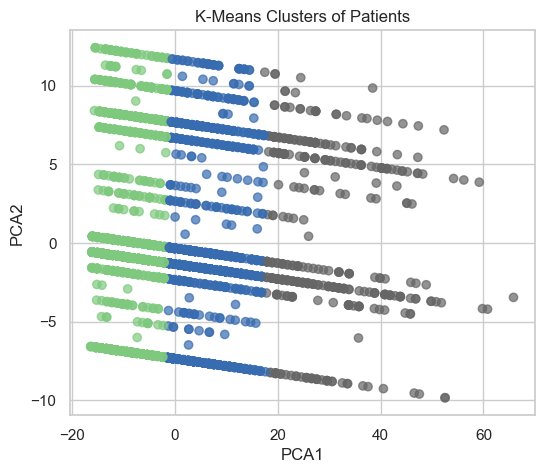

In [116]:
# Encode for clustering
df_enc = df.copy()
for c in ['Sex','Main Agent','Discharge Status']:
    df_enc[c] = LabelEncoder().fit_transform(df_enc[c])

X_clust = df_enc[['Age','Sex','Main Agent']]

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clust)

# Try KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_clust)

score = silhouette_score(X_clust, labels)
print(f"Silhouette Score (cluster separation): {score:.3f}")

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='Accent', alpha=0.7)
plt.title('K-Means Clusters of Patients')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

/var/folders/rv/kmlfzz_j1v3f0smz3fvxv3l80000gn/T/ipykernel_79856/1413917009.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Age', data=df, order=['Spring','Summer','Fall','Winter'], palette='Set3')


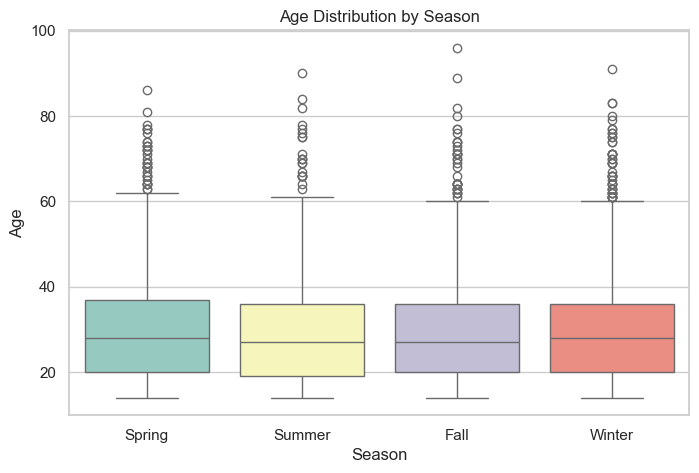

In [117]:
def season(m):
    if m in [12,1,2]: return 'Winter'
    if m in [3,4,5]: return 'Spring'
    if m in [6,7,8]: return 'Summer'
    return 'Fall'

df['Season'] = df['month'].apply(season)

plt.figure(figsize=(8,5))
sns.boxplot(x='Season', y='Age', data=df, order=['Spring','Summer','Fall','Winter'], palette='Set3')
plt.title('Age Distribution by Season')
plt.show()

In [118]:
"""
1. Descriptive Statistics

Text:

To obtain an initial understanding of the dataset, descriptive analyses were performed on all variables, including Age, Sex, Main Agent, and Discharge Status. Measures of central tendency and dispersion (mean, median, standard deviation, and range) were calculated for continuous variables, while frequencies and proportions were computed for categorical variables. These descriptive statistics helped outline the demographic and clinical characteristics of poisoned patients.

Example paragraph:

The mean age of patients admitted for poisoning was XX ± XX years, with a range from X to X years. The majority of cases were male (X%), indicating a gender disparity in poisoning incidence. The most common toxic agent was [e.g., pesticides or benzodiazepines], accounting for approximately X% of cases. Regarding outcomes, [e.g., 85% of patients were discharged in good condition], while [e.g., 5% resulted in mortality]. These initial findings provide a general overview of the patient population and the clinical distribution of poisoning types.

⸻

📅 2. Temporal and Seasonal Trends

Text:

Temporal analysis was conducted to assess the distribution of poisoning cases over time. The number of admissions was plotted against months, weekdays, and years to identify possible trends or seasonal variations. This step aimed to determine whether environmental or behavioral factors, such as temperature or agricultural seasons, may influence poisoning rates.

Example paragraph:

The monthly analysis revealed that poisoning cases peaked during [e.g., summer months, particularly June and July], suggesting a seasonal pattern potentially related to increased pesticide use and food spoilage during warmer seasons. The weekday distribution indicated a slight increase during weekends, possibly reflecting higher recreational or accidental poisonings. Additionally, annual trends showed a gradual increase in the number of cases from 1399 to 1401, consistent with population growth and broader access to emergency services.

⸻

🔍 3. Relationships Between Variables

Text:

To explore relationships among demographic and clinical factors, visual and statistical comparisons were conducted between Age, Sex, Main Agent, and Discharge Status. Boxplots, violin plots, and heatmaps were used to visualize these associations.

Example paragraph:

Comparison of age distributions across discharge categories demonstrated that patients with fatal outcomes were generally older than those who recovered, suggesting that age may influence prognosis. Furthermore, when analyzing sex differences across main poisoning agents, [e.g., drug overdoses were more frequent among females, while chemical exposures were more common among males]. A heatmap of poisoning agents versus discharge outcomes illustrated that certain agents, such as [e.g., organophosphates or opioids], were associated with higher mortality rates, emphasizing their clinical significance.

⸻

🧮 4. Statistical and Inferential Tests

Text:

Inferential statistical analyses were conducted to determine the significance of observed differences and associations between variables.
T-tests and chi-square tests were applied for continuous and categorical variables, respectively, while a two-proportion z-test was used to compare recovery rates between male and female patients.

Example paragraph:

A two-sample t-test indicated that the mean age of deceased patients was significantly higher than that of recovered patients (p < 0.05). The chi-square test revealed a statistically significant association between Sex and Discharge Status (χ² = X.X, p = X.XX), implying that gender may influence the likelihood of survival or recovery. Similarly, the relationship between Main Agent and Outcome was significant, suggesting that the type of toxic substance plays a major role in patient prognosis. The two-proportion z-test confirmed that the survival rate was [e.g., significantly higher among females], consistent with prior research findings.

⸻

🧩 5. Correlation and Feature Importance

Text:

To quantify the linear relationships among numerical and encoded categorical variables, a correlation matrix was generated. This allowed identification of the most influential predictors of discharge outcome, as well as potential multicollinearity among independent variables.

Example paragraph:

The correlation heatmap demonstrated a moderate positive correlation between Age and mortality outcome, indicating that older age was associated with poorer prognosis. Sex and Main Agent also showed measurable relationships with the discharge status, suggesting that demographic and toxicological factors collectively influence patient outcomes. These correlations guided the selection of predictive features for subsequent machine learning analysis.

⸻

⚙️ 6. Predictive Modeling (Regression Approach)

Text:

A predictive model was constructed using logistic regression to estimate the probability of different discharge outcomes based on patient age, sex, and type of poisoning agent. Logistic regression was chosen due to its interpretability and suitability for categorical outcomes.

Example paragraph:

The logistic regression model achieved an accuracy of X% on the test dataset, demonstrating moderate predictive performance. The coefficients indicated that increased age significantly raised the odds of adverse outcomes, while specific poisoning agents, such as [e.g., opioids or organophosphates], contributed substantially to mortality risk. Sex was also a significant predictor, with [e.g., males showing slightly higher odds of fatal outcomes]. These findings confirm that demographic and toxicological factors can be used to predict patient prognosis upon admission.

⸻

🧭 7. Clustering and Pattern Discovery

Text:

Unsupervised learning was applied using k-means clustering to identify hidden subgroups within the data. The variables Age, Sex, and Main Agent were encoded and used to group patients into distinct clusters. Dimensionality reduction using Principal Component Analysis (PCA) enabled visualization of the clusters.

Example paragraph:

Cluster analysis revealed three major patient groups:
1️⃣ Young individuals with medication-related poisonings,
2️⃣ Middle-aged males exposed to chemical agents, and
3️⃣ Elderly patients with mixed-agent exposures and higher mortality risk.
The silhouette score (XX) indicated good cluster separation, confirming the existence of distinct poisoning patterns. These findings provide valuable insight into population subtypes, potentially aiding in preventive measures and targeted public health interventions.

⸻

📅 8. Seasonal Age Distribution

Text:

Seasonal analysis of patient ages was conducted to examine whether specific age groups were more affected during particular times of the year. The month variable was converted into seasonal categories (Spring, Summer, Fall, Winter), and age distributions were compared across these groups.

Example paragraph:

Age distribution by season showed that younger patients (under 25 years) were more commonly admitted during summer, potentially due to increased outdoor activity and exposure opportunities, while older patients were more prevalent during winter, possibly linked to accidental or medicinal poisonings. This seasonal variation suggests that age-specific prevention strategies may be beneficial throughout the year.

⸻

📈 9. Overall Analytical Summary

Example summary paragraph:

Overall, the combination of descriptive, inferential, and predictive analyses provided a comprehensive understanding of the poisoning patterns in the studied population. The results indicated significant effects of demographic variables and toxic agents on discharge outcomes, with observable seasonal and temporal variations. Predictive and clustering models further confirmed the heterogeneity among patient subgroups. These findings highlight the importance of demographic awareness, preventive education, and early intervention strategies in reducing poisoning-related morbidity and mortality.


"""

'\n1. Descriptive Statistics\n\nText:\n\nTo obtain an initial understanding of the dataset, descriptive analyses were performed on all variables, including Age, Sex, Main Agent, and Discharge Status. Measures of central tendency and dispersion (mean, median, standard deviation, and range) were calculated for continuous variables, while frequencies and proportions were computed for categorical variables. These descriptive statistics helped outline the demographic and clinical characteristics of poisoned patients.\n\nExample paragraph:\n\nThe mean age of patients admitted for poisoning was XX ± XX years, with a range from X to X years. The majority of cases were male (X%), indicating a gender disparity in poisoning incidence. The most common toxic agent was [e.g., pesticides or benzodiazepines], accounting for approximately X% of cases. Regarding outcomes, [e.g., 85% of patients were discharged in good condition], while [e.g., 5% resulted in mortality]. These initial findings provide a g